# Data Visualization Metamorphosis

### [Ethereum Fraud Dataset](https://www.kaggle.com/datasets/gescobero/ethereum-fraud-dataset)

--------------

### Sepand Haghighi - Farzad Ramezani

### September 2022

--------------

### Cleaning

We performed a very limited cleaning step for this dataset and only removed columns with zero variance.
These columns are:
1. ....
2. ....

The cleaned dataset is stored in file `2.csv`

### Loading

In [1]:
import sys
try:
  import google.colab
  !{sys.executable} -m pip -q -q install pandas>=0.24.2
  !{sys.executable} -m pip -q -q install matplotlib>=3.0.3
  !{sys.executable} -m pip -q -q install seaborn>=0.9.1
  !{sys.executable} -m pip -q -q install numpy>=1.18.5
except:
  pass

In [2]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = pd.read_csv(os.path.join("Data", "2.csv"))

### Statistics and Distribution 

#### Overall Statistics

In [3]:
df.columns

Index(['address', 'flag', 'minTimeBetweenSentTnx', 'maxTimeBetweenSentTnx',
       'avgTimeBetweenSentTnx', 'minTimeBetweenRecTnx', 'maxTimeBetweenRecTnx',
       'avgTimeBetweenRecTnx', 'lifetime', 'sentTransactions',
       'receivedTransactions', 'createdContracts',
       'Average_of_numUniqSentAddress', 'Average_of_numUniqRecAddress',
       'minValSent', 'maxValSent', 'avgValSent', 'minValReceived',
       'maxValReceived', 'avgValReceived', 'totalTransactions',
       'totalEtherSent', 'totalEtherReceived', 'totalEtherBalance',
       'activityDays', 'dailyMax', 'ratioRecSent', 'ratioSentTotal',
       'ratioRecTotal', 'giniSent', 'giniRec', 'txFreq', 'stdBalanceEth'],
      dtype='object')

In [4]:
len(df.columns)

33

In [5]:
df.describe()

,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,receivedTransactions,createdContracts,Average_of_numUniqSentAddress,Average_of_numUniqRecAddress,minValSent,maxValSent,avgValSent,minValReceived,maxValReceived,avgValReceived,totalTransactions,totalEtherSent,totalEtherReceived,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
count,12146.000000,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000,1.214600e+04,1.214600e+04,1.214600e+04,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000,1.214600e+04,1.214600e+04,12146.000000,1.214600e+04
mean,0.424008,2.649065e+04,4.270947e+07,3.648564e+06,2.499426e+05,1.162226e+09,1.601823e+08,191.749630,517.366787,678.387617,1.760333,99.648938,278.234398,6.254205,166.900458,12.146658,13.719381,265.202176,52.052336,1197.514737,3.060886e+03,2.924125e+03,-1.367650e+02,85.492343,209.392393,581.427949,0.458685,0.452111,4.341055e-01,4.104000e-01,64.605495,6.970988e+02
std,0.494212,7.167752e+05,2.510061e+08,4.121296e+07,3.403948e+06,7.159138e+08,2.329373e+08,299.970482,1875.017481,2253.808922,105.556010,622.977995,1124.944769,247.789066,6049.068918,296.204395,494.780188,8203.540956,2668.284325,2935.498052,9.265957e+04,5.823186e+04,6.582241e+04,172.709068,974.655740,2206.404201,0.332333,0.317690,3.745526e-01,3.009740e-01,543.602564,2.432648e+04
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,-5.348493e+06,1.000000,1.000000,0.000000,0.000000,0.000000,-6.740000e-17,-9.320000e-17,0.001145,0.000000e+00
25%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.794640e+06,8.564709e+04,9.000000,1.000000,3.000000,0.000000,1.000000,2.000000,0.000000,0.021382,0.004042,0.000000,0.119870,0.041957,7.000000,3.350184e-02,3.053866e-01,-3.532467e-01,3.000000,2.000000,0.230311,0.142857,0.186526,0.000000e+00,9.707937e-02,0.277778,8.364961e-02
50%,0.000000,0.000000e+00,2.042395e+05,1.490919e+04,4.800000e+01,1.578994e+09,4.776982e+07,68.000000,6.000000,11.000000,0.000000,3.000000,5.000000,0.000000,1.006568,0.137807,0.006396,1.000000,0.250000,34.000000,3.000000e+00,3.796921e+00,1.563244e-03,15.000000,5.000000,0.620312,0.454545,0.375000,4.940496e-01,4.459279e-01,1.080336,9.335405e-01
75%,1.000000,8.000000e+01,1.845179e+06,1.391289e+05,7.147500e+02,1.640623e+09,2.192212e+08,251.000000,70.000000,55.000000,0.000000,17.000000,16.000000,0.052306,7.028250,1.302288,0.057475,5.000000,1.042968,282.000000,2.380862e+01,2.332307e+01,4.064367e-02,85.000000,24.000000,2.741071,0.773654,0.714286,8.008659e-01,6.347963e-01,4.000000,6.826739e+00
max,1.000000,6.198813e+07,1.658260e+09,8.291299e+08,1.508562e+08,1.658260e+09,8.309932e+08,2293.000000,10000.000000,10000.000000,9947.000000,9950.000000,9996.000000,25533.614330,611102.014500,25533.614330,25533.614520,800000.000000,283618.831600,19948.000000,6.813193e+06,2.955140e+06,1.847901e+06,1912.000000,10000.000000,10000.000000,0.999900,0.999900,9.998963e-01,9.998940e-01,10000.000000,2.038484e+06


#### Overall Distribution

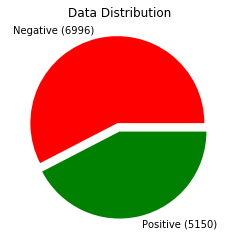

In [6]:
positive_sample = df[(df["flag"]==1)]
negative_sample = df[(df["flag"]==0)]
dist = df["flag"].value_counts()
plt.pie(dist, labels = ["Negative ({0})".format(len(negative_sample)), "Positive ({0})".format(len(positive_sample))], colors = ["r", "g"], explode=[0.1, 0])
plt.title("Data Distribution")
plt.show()

⚠️ Dataset is balanced

### Comparing Different Features

In [7]:
columns = df.columns[1:]
positive_sample = df[df["flag"]==1]
negative_sample  = df[df["flag"]==0].sample(n = len(positive_sample), replace = False)

median_positive = positive_sample[columns].median(skipna=True).round(3)
median_negative = negative_sample[columns].median(skipna=True).round(3)
q25_positive = positive_sample[columns].quantile(q=0.25).round(3)
q25_negative = negative_sample[columns].quantile(q=0.25).round(3)
q75_positive = positive_sample[columns].quantile(q=0.75).round(3)
q75_negative = negative_sample[columns].quantile(q=0.75).round(3)
mean_positive = positive_sample[columns].mean(skipna=True).round(3)
mean_negative = negative_sample[columns].mean(skipna=True).round(3)


def autolabel(ax, rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')


def plot_bar(col):
    x = ["Positive", "Negative"]
    data_list = [[mean_positive[col], mean_negative[col]], [median_positive[col], median_negative[col]], [q25_positive[col], q25_negative[col]], [q75_positive[col], q75_negative[col]]]
    titles_list = ["Mean | Ratio(P/N):{0}% | Diff(ABS): {1}", "Median | Ratio(P/N):{0}% | Diff(ABS): {1}", "Quantile 0.25 | Ratio(P/N):{0}% | Diff(ABS): {1}", "Quantile 0.75 | Ratio(P/N):{0}% | Diff(ABS): {1}"]
    colors_list = ["b", "g", "y", "r"]
    for index, item in enumerate(data_list):
        ax = plt.subplot(2,2,index + 1)
        rects = ax.bar(x, item, width=0.4, color=colors_list[index])
        autolabel(ax, rects)
        ax.set_ylim([0, 1.2 * max(item)])
        ax.set_title(titles_list[index].format(round(item[0]/item[1] * 100, 1), round(item[0] - item[1], 1)))
    #plt.suptitle(" ".join(col.split("_")).capitalize())
    plt.subplots_adjust(right=2, top=2)
    plt.show()

#### Total Transactions

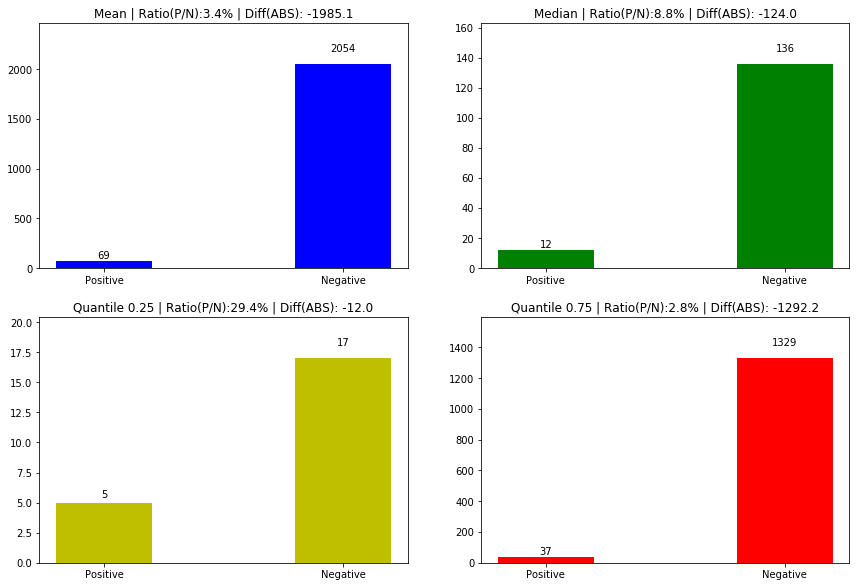

In [8]:
plot_bar("totalTransactions")

⚠️ We can see that `Total Transactions` is significantly higher in `Non-Fraud` transactions

#### Average Time Between Received Transactions 

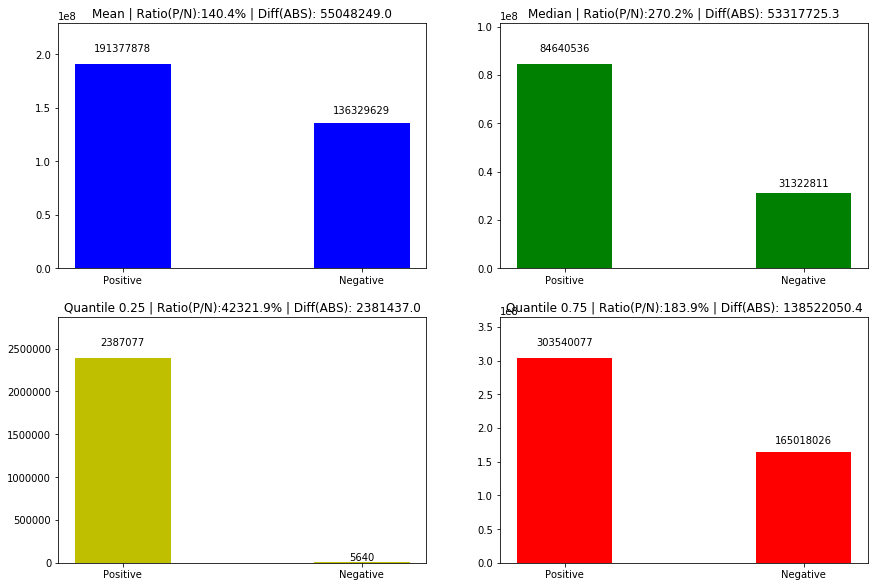

In [9]:
plot_bar("avgTimeBetweenRecTnx")

⚠️ We can see that `Average Time Between Sent Transactions` is significantly higher in `Fraud` transactions

⚠️ It's against what we saw before in `Dataset1`!

#### Lifetime

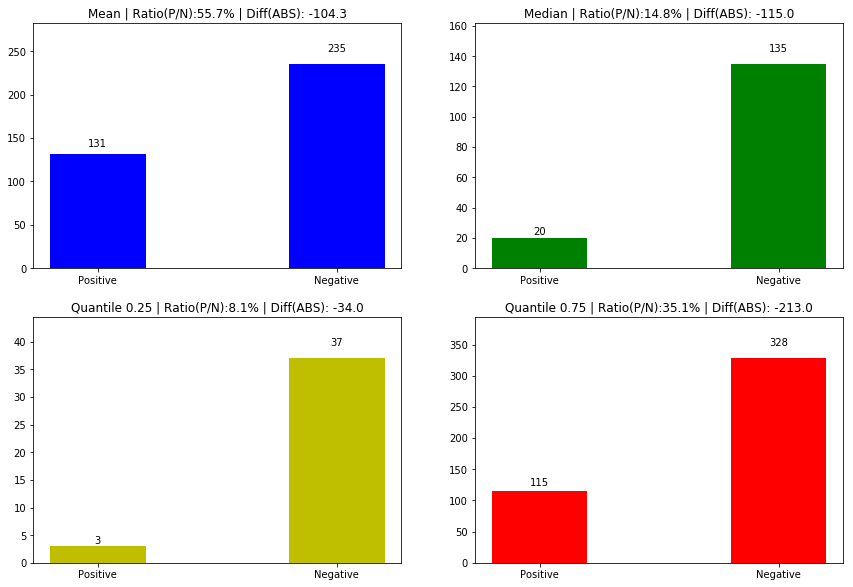

In [10]:
plot_bar("lifetime")

⚠️ We can see that `Lifetime` is significantly higher in `Non-Fraud` transactions

#### Received Transactions

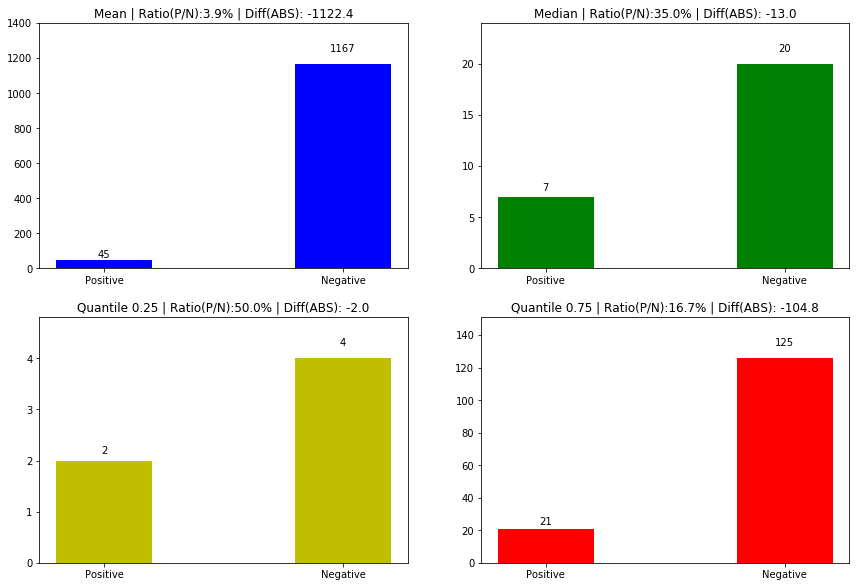

In [11]:
plot_bar("receivedTransactions")

⚠️ We can see that `Received Transactions` is significantly higher in `Non-Fraud` transactions

#### Sent Transactions

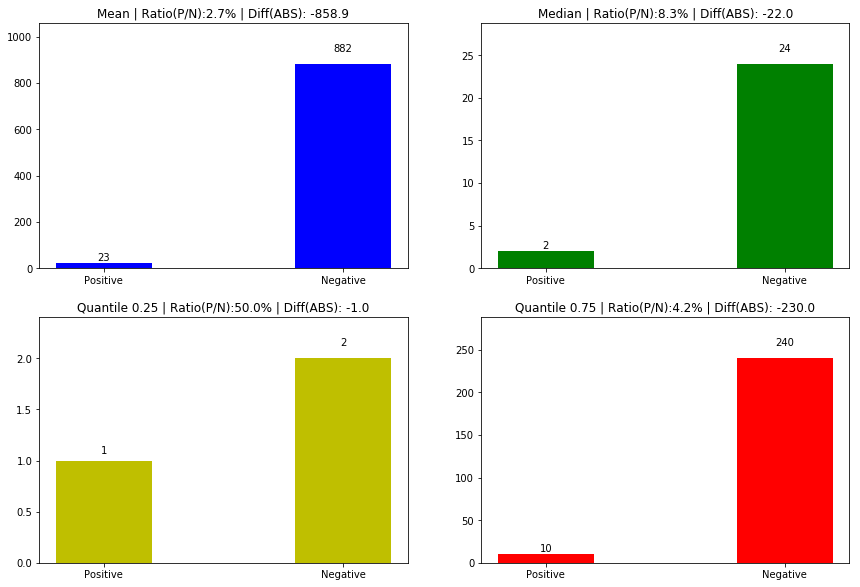

In [12]:
plot_bar("sentTransactions")

⚠️ We can see that `Sent Transactions` is significantly higher in `Non-Fraud` transactions

#### Activity Days

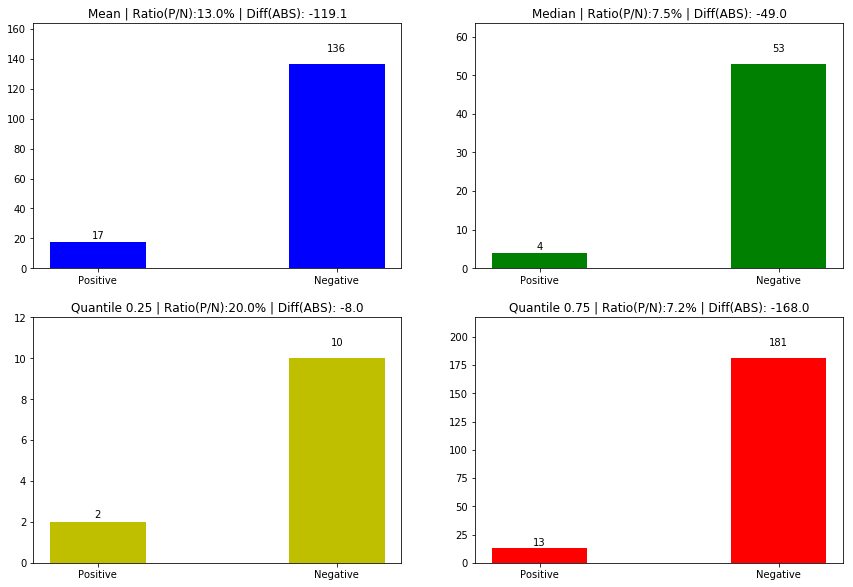

In [13]:
plot_bar("activityDays")

⚠️ We can see that `Activity Days` is significantly higher in `Non-Fraud` transactions

#### Average of Unique Sent Addresses

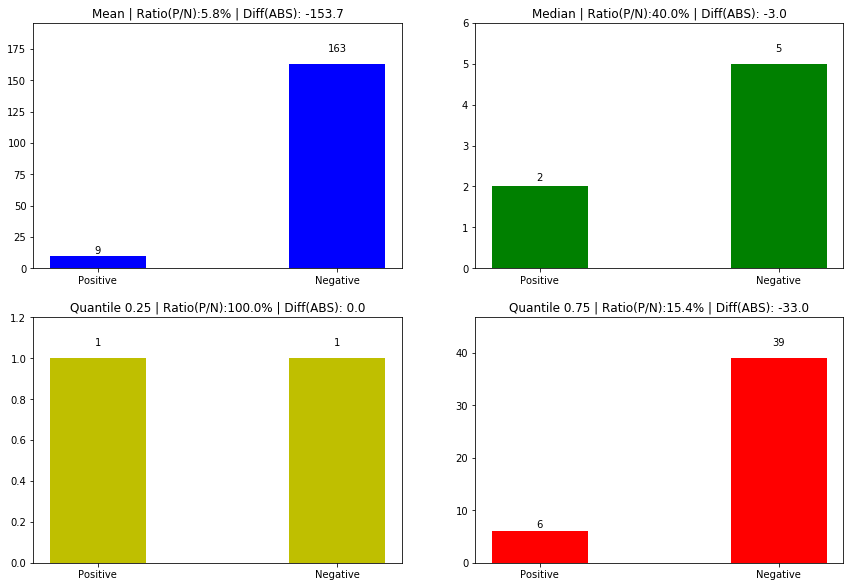

In [14]:
plot_bar("Average_of_numUniqSentAddress")

⚠️ We can see that `Average of Unique Sent Addresses` is significantly higher in `Non-Fraud` transactions

### Correlation Between Features

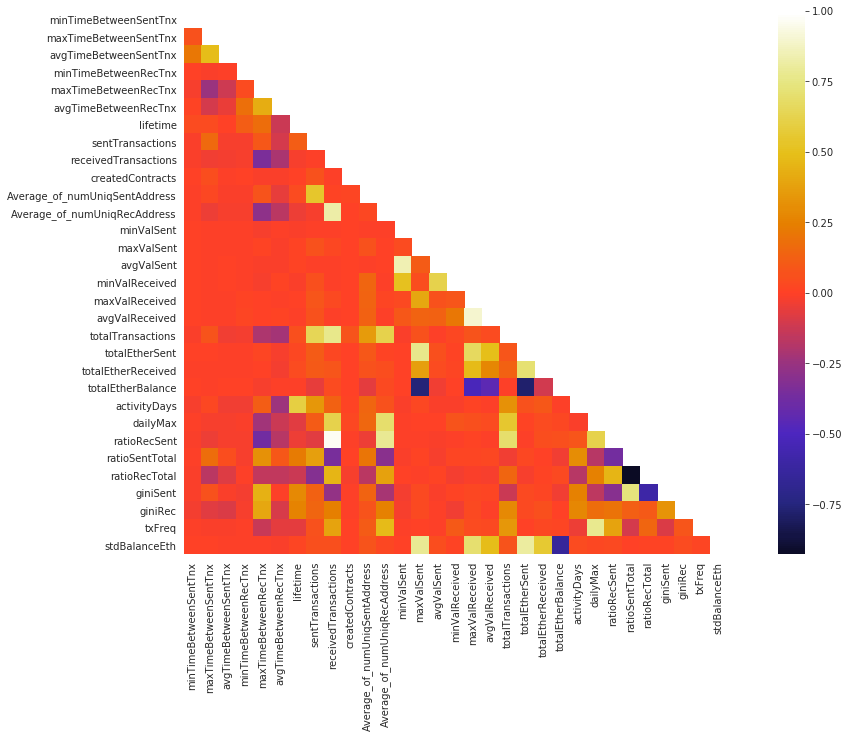

In [15]:
df.drop("flag", axis=1, inplace=True)
df.drop("address", axis=1, inplace=True)
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)

### Features Distribution

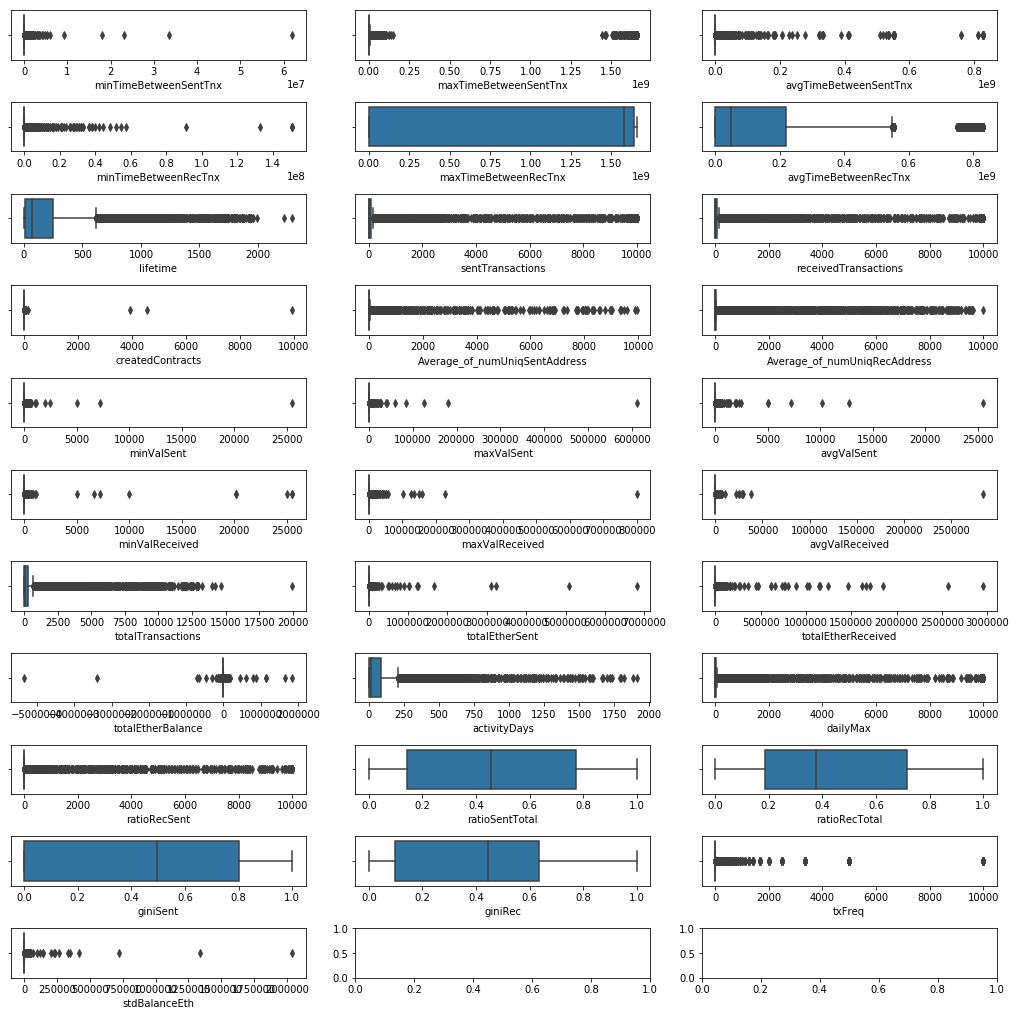

In [16]:
plot_col = 3
plot_row = math.ceil(len(df.columns) / plot_col)
fig, axes = plt.subplots(plot_row, plot_col, figsize=(14, 14), constrained_layout =True)
row = 0
col = 0
for i in range(len(df.columns)):
    _ = sns.boxplot(ax = axes[row,col], data=df, x=df.columns[i])
    col += 1
    if col == 3:
        col = 0
        row += 1